In [2]:
import pandas as pd

In [5]:
# donations = pd.read_csv('donations.csv/donations.csv')
projects = pd.read_csv('projects.csv/projects.csv')
# outcomes = pd.read_csv('outcomes.csv/outcomes.csv')

In [3]:
data = pd.read_csv("clustering_data_cleaned.csv")
data.head()

,projectid,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow,...,primary_focus_subject_Special Needs,primary_focus_subject_Sports,primary_focus_subject_Visual Arts,primary_focus_area_Applied Learning,primary_focus_area_Health & Sports,primary_focus_area_History & Civics,primary_focus_area_Literacy & Language,primary_focus_area_Math & Science,primary_focus_area_Music & The Arts,primary_focus_area_Special Needs
0,fffeebf4827d745aa36b17c2d38d1966,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,fffdfdcf27588d2d32c15c12dec3a2cb,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,fffc602212a37bd35f49c51d2cd6a514,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,fffc128714a3035d7af7637c4ab30615,1,0,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
4,fffbc23d5c2ece64168af350ab9f6cad,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
# donations_set = set(donations.columns)
# projects_set = set(projects.columns)
# outcomes_set = set(outcomes.columns)

# dp_set = donations_set.intersection(projects_set)
# dp_set

{'projectid'}

In [7]:
# data = pd.merge(donations, projects, on='projectid')
# data = pd.merge(data, outcomes, on='projectid')
# data.columns

Index(['donationid', 'projectid', 'donor_acctid', 'donor_city', 'donor_state',
       'donor_zip', 'is_teacher_acct', 'donation_timestamp',
       'donation_to_project', 'donation_optional_support', 'donation_total',
       'dollar_amount', 'donation_included_optional_support', 'payment_method',
       'payment_included_acct_credit', 'payment_included_campaign_gift_card',
       'payment_included_web_purchased_gift_card', 'payment_was_promo_matched',
       'via_giving_page', 'for_honoree', 'donation_message', 'teacher_acctid',
       'schoolid', 'school_ncesid', 'school_latitude', 'school_longitude',
       'school_city', 'school_state', 'school_zip', 'school_metro',
       'school_district', 'school_county', 'school_charter', 'school_magnet',
       'school_year_round', 'school_nlns', 'school_kipp',
       'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'se

In [6]:
# merge data with projects keeping only school_latitue and school_longitude from projects
data = pd.merge(data, projects[['projectid', 'school_latitude', 'school_longitude']], on='projectid')
data.columns

Index(['projectid', 'school_charter', 'school_magnet', 'school_year_round',
       'school_nlns', 'school_kipp', 'school_charter_ready_promise',
       'teacher_prefix', 'teacher_teach_for_america',
       'teacher_ny_teaching_fellow', 'poverty_level',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'len_essay', 'len_short_desc', 'len_need_statement',
       'Num_essays_submitted', 'Analysis_Polarity_short_description',
       'Analysis_Polarity_title', 'region_Central', 'region_East',
       'region_North', 'region_Northwest', 'region_Other', 'region_South',
       'region_Southeast', 'region_Southwest', 'region_West',
       'primary_focus_subject_Applied Sciences',
       'primary_focus_subject_Character Education',
       'primary_focus_subject_Civics & Government',
       'primary_focus_subject_College & Career Prep',
       'primary_focus_subject_Community Service', 'primary_focus_subject_ESL',
       'primary_focus_subject_Early Development',
   

In [7]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Preprocess Data

# Encode categorical variables if any
# data = pd.get_dummies(data, columns=['categorical_column'])

# Step 4: Randomly Assign Clusters
# Define the number of clusters
n_clusters = 300

# Randomly assign cluster labels
np.random.seed(42)  # For reproducibility
data['Cluster'] = np.random.randint(0, n_clusters, size=len(data))

# # Step 5: Visualize Clusters
# # Assuming we want to visualize the first two features
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue='Cluster', palette='viridis', data=data)
# plt.title('Randomly Assigned Clusters Visualization')
# plt.show()

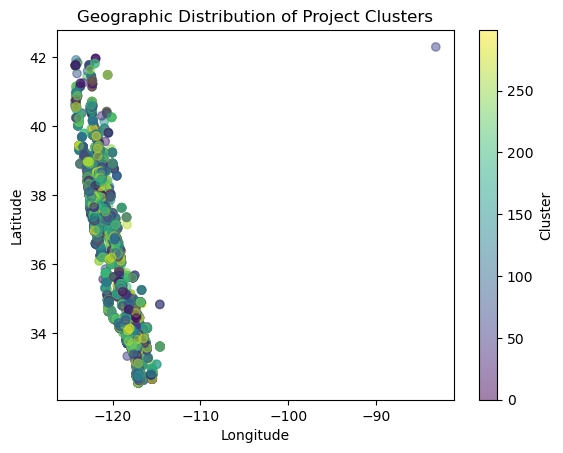

In [8]:
plt.scatter(data['school_longitude'], data['school_latitude'], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Project Clusters')
plt.show()

In [10]:
# drop the projectid and latitude and longitude columns
scores_data = data.drop(columns=['projectid', 'school_latitude', 'school_longitude'])


In [11]:
n_clusters_ = len(set(data)) - (1 if -1 in data else 0)
print(f"Number of clusters: {n_clusters_}")

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

score = calinski_harabasz_score(scores_data, scores_data['Cluster'])
print("Calinski-Harabasz Index:", score)

dbi = davies_bouldin_score(scores_data, scores_data['Cluster'])
print(f"Davies-Bouldin Index: {dbi}")

Number of clusters: 65
Calinski-Harabasz Index: 923716.4056405433
Davies-Bouldin Index: 3.6567412793907805


In [13]:
donors = pd.read_csv('donations.csv/donations.csv')
donors = donors[['projectid', 'donor_acctid']]

In [19]:
clustering_metric = pd.merge(data, donors, on='projectid', how='left')
print(clustering_metric.isnull().sum())
clustering_metric.rename(columns={'donor_acctid':'donor_id', 'Cluster':'cluster_id'}, inplace=True)


projectid                               0
school_charter                          0
school_magnet                           0
school_year_round                       0
school_nlns                             0
                                    ...  
primary_focus_area_Special Needs        0
Cluster                                 0
school_latitude                         0
school_longitude                        0
donor_acctid                        23267
Length: 66, dtype: int64


In [20]:
import pandas as pd
import numpy as np


def calculate_weighted_entropy(df: pd.DataFrame) -> pd.DataFrame:
    # Step 1: Calculate the count of donations per donor
    donor_total_counts = df.groupby('donor_id').size().reset_index(name='total_count')

    # Step 2: Filter out donors who donated fewer than 2 times
    valid_donors = donor_total_counts[donor_total_counts['total_count'] >= 2]['donor_id']
    filtered_df = df[df['donor_id'].isin(valid_donors)]

    # Step 3: Calculate the count of donations per donor per cluster
    donor_cluster_counts = filtered_df.groupby(['donor_id', 'cluster_id']).size().reset_index(name='count')

    # Step 4: Calculate the total count of donations per donor
    donor_total_counts = donor_cluster_counts.groupby('donor_id')['count'].sum().reset_index(name='total_count')

    # Step 5: Merge to get the total count per donor
    donor_cluster_counts = donor_cluster_counts.merge(donor_total_counts, on='donor_id')

    # Step 6: Calculate the probability of donating to each cluster for each donor
    donor_cluster_counts['probability'] = donor_cluster_counts['count'] / donor_cluster_counts['total_count']

    # Step 7: Calculate the entropy for each donor
    donor_cluster_counts['entropy_component'] = -donor_cluster_counts['probability'] * np.log2(donor_cluster_counts['probability'])
    entropy_df = donor_cluster_counts.groupby('donor_id')['entropy_component'].sum().reset_index()
    entropy_df.rename(columns={'entropy_component': 'entropy'}, inplace=True)

    # Step 8: Calculate the weight adjustment for each donor
    entropy_df = entropy_df.merge(donor_total_counts, on='donor_id')
    entropy_df['weight_adjustment'] = 1 / (np.log(entropy_df['total_count'] + 1) + 1)

    # Step 9: Calculate the weighted entropy
    entropy_df['weighted_entropy'] = entropy_df['entropy'] * entropy_df['weight_adjustment']

    # Return the final DataFrame with donor_id, entropy, and weighted_entropy
    return entropy_df[['donor_id', 'entropy', 'weighted_entropy']]

In [21]:
entropy_df_random = calculate_weighted_entropy(clustering_metric)
print(entropy_df_random)

                               donor_id   entropy  weighted_entropy
0      0000482911ae76b75d260d9f1fe60bca  2.584963          0.877475
1      000131ab172291002281c7bcbc23a0b6  1.000000          0.476505
2      0006f3a33e15d561eaa187402ab6a564  1.000000          0.476505
3      00080c99912eae7f223122fe6f04d1f9  1.000000          0.476505
4      000b97503d29b66926cf9db06ea60f49  0.000000          0.000000
...                                 ...       ...               ...
73987  fffa28a29c9ab8ac16494bb026a6545c  1.000000          0.476505
73988  fffb15d0f430ce9eb9ac9a1ee8ac3187  2.000000          0.766449
73989  fffbd6241b2096a550503e49570d5538  1.000000          0.476505
73990  fffbf616e35301c5265010f943aec727  1.000000          0.476505
73991  fffce3f0a6d8e368b0022b94cc686f69  2.750000          0.860121

[73992 rows x 3 columns]


In [22]:
avg_weighted_entropy = entropy_df_random['weighted_entropy'].mean()
print(avg_weighted_entropy)

0.5035774757511575


In [14]:
final = pd.read_csv("final_cluster_labels.csv")
final.head()

,projectid,Cluster labels with HDBSCAN 2
0,fffeebf4827d745aa36b17c2d38d1966,15
1,fffdfdcf27588d2d32c15c12dec3a2cb,134
2,fffc602212a37bd35f49c51d2cd6a514,24
3,fffc128714a3035d7af7637c4ab30615,-1
4,fffbc23d5c2ece64168af350ab9f6cad,164


In [24]:
clustering_metric = pd.merge(final, donors, on='projectid', how='left')
print(clustering_metric.isnull().sum())
clustering_metric.rename(columns={'donor_acctid':'donor_id', 'Cluster labels with HDBSCAN 2':'cluster_id'}, inplace=True)


projectid                            0
Cluster labels with HDBSCAN 2        0
donor_acctid                     23267
dtype: int64


In [25]:
entropy_df_hdbscan = calculate_weighted_entropy(clustering_metric)
print(entropy_df_hdbscan)

                               donor_id   entropy  weighted_entropy
0      0000482911ae76b75d260d9f1fe60bca  2.251629          0.764324
1      000131ab172291002281c7bcbc23a0b6  1.000000          0.476505
2      0006f3a33e15d561eaa187402ab6a564  0.000000          0.000000
3      00080c99912eae7f223122fe6f04d1f9  1.000000          0.476505
4      000b97503d29b66926cf9db06ea60f49  0.000000          0.000000
...                                 ...       ...               ...
73987  fffa28a29c9ab8ac16494bb026a6545c  1.000000          0.476505
73988  fffb15d0f430ce9eb9ac9a1ee8ac3187  2.000000          0.766449
73989  fffbd6241b2096a550503e49570d5538  1.000000          0.476505
73990  fffbf616e35301c5265010f943aec727  1.000000          0.476505
73991  fffce3f0a6d8e368b0022b94cc686f69  2.500000          0.781928

[73992 rows x 3 columns]


In [26]:
avg_weighted_entropy = entropy_df_hdbscan['weighted_entropy'].mean()
print(avg_weighted_entropy)

0.3517062796482014
